In [1]:
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


In [73]:
AFRICA_COUNTRIES=['Algeria',
'Angola',
'Benin',
'Botswana',
'Burkina Faso',
'Burundi',
'Cameroon',
'Cape Verde',
'Central African Republic',
'Chad',
'Comoros',
'Congo, Dem. Rep.',
'Congo, Rep.',
'Djibouti',
'Egypt, Arab Rep.',
'Equatorial Guinea',
'Eritrea',
'Ethiopia',
'Gabon',
'Gambia, The',
'Ghana',
'Guinea',
'Guinea-Bissau',
'Ivory Coast',
'Kenya',
'Lesotho',
'Liberia',
'Libya',
'Madagascar',
'Malawi',
'Mali',
'Mauritania',
'Mauritius',
'Morocco',
'Mozambique',
'Namibia',
'Niger',
'Nigeria',
'Rwanda',
'Sao Tome and Principe',
'Senegal',
'Seychelles',
'Sierra Leone',
'Somalia',
'South Africa',
'South Sudan',
'Sudan',
'Swaziland',
'Tanzania',
'Togo',
'Tunisia',
'Uganda',
'Zambia',
'Zimbabwe']

In [74]:
print(AFRICA_COUNTRIES)

['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']


In [75]:
#Load the Data from the CSV files
#Population Data
csv_file = "data/POPULATION.csv"
Population_df_all = pd.read_csv(csv_file,skiprows=4)
Population_df_all.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [76]:
#Dropping data and focusing only on data from 2007 to 2017 (10 years)
Population_10_All_df=pd.DataFrame(Population_df_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'])
Population_10_All_df.head()

,Country Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [77]:
Population_10_All_df.set_index('Country Name', inplace=True)
Population_10_All_df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Aruba,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
Afghanistan,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
Angola,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
Albania,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
Andorra,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [153]:
Population_AF_df=Population_10_All_df.loc[AFRICA_COUNTRIES]
Population_AF_df.head()


C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0
Angola,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
Benin,8454791.0,8696916.0,8944706.0,9199259.0,9460802.0,9729160.0,10004451.0,10286712.0,10575952.0,10872298.0,11175692.0
Botswana,1914414.0,1946351.0,1979882.0,2014866.0,2051339.0,2089315.0,2128507.0,2168573.0,2209197.0,2250260.0,2291661.0
Burkina Faso,14252021.0,14689726.0,15141099.0,15605217.0,16081904.0,16571216.0,17072723.0,17585977.0,18110624.0,18646433.0,19193382.0


In [170]:
Population_AF_df=Population_AF_df.dropna()
Population_AF_df.reset_index(inplace=False).head()

,Country Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Algeria,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0
1,Angola,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
2,Benin,8454791.0,8696916.0,8944706.0,9199259.0,9460802.0,9729160.0,10004451.0,10286712.0,10575952.0,10872298.0,11175692.0
3,Botswana,1914414.0,1946351.0,1979882.0,2014866.0,2051339.0,2089315.0,2128507.0,2168573.0,2209197.0,2250260.0,2291661.0
4,Burkina Faso,14252021.0,14689726.0,15141099.0,15605217.0,16081904.0,16571216.0,17072723.0,17585977.0,18110624.0,18646433.0,19193382.0


<IPython.core.display.Javascript object>


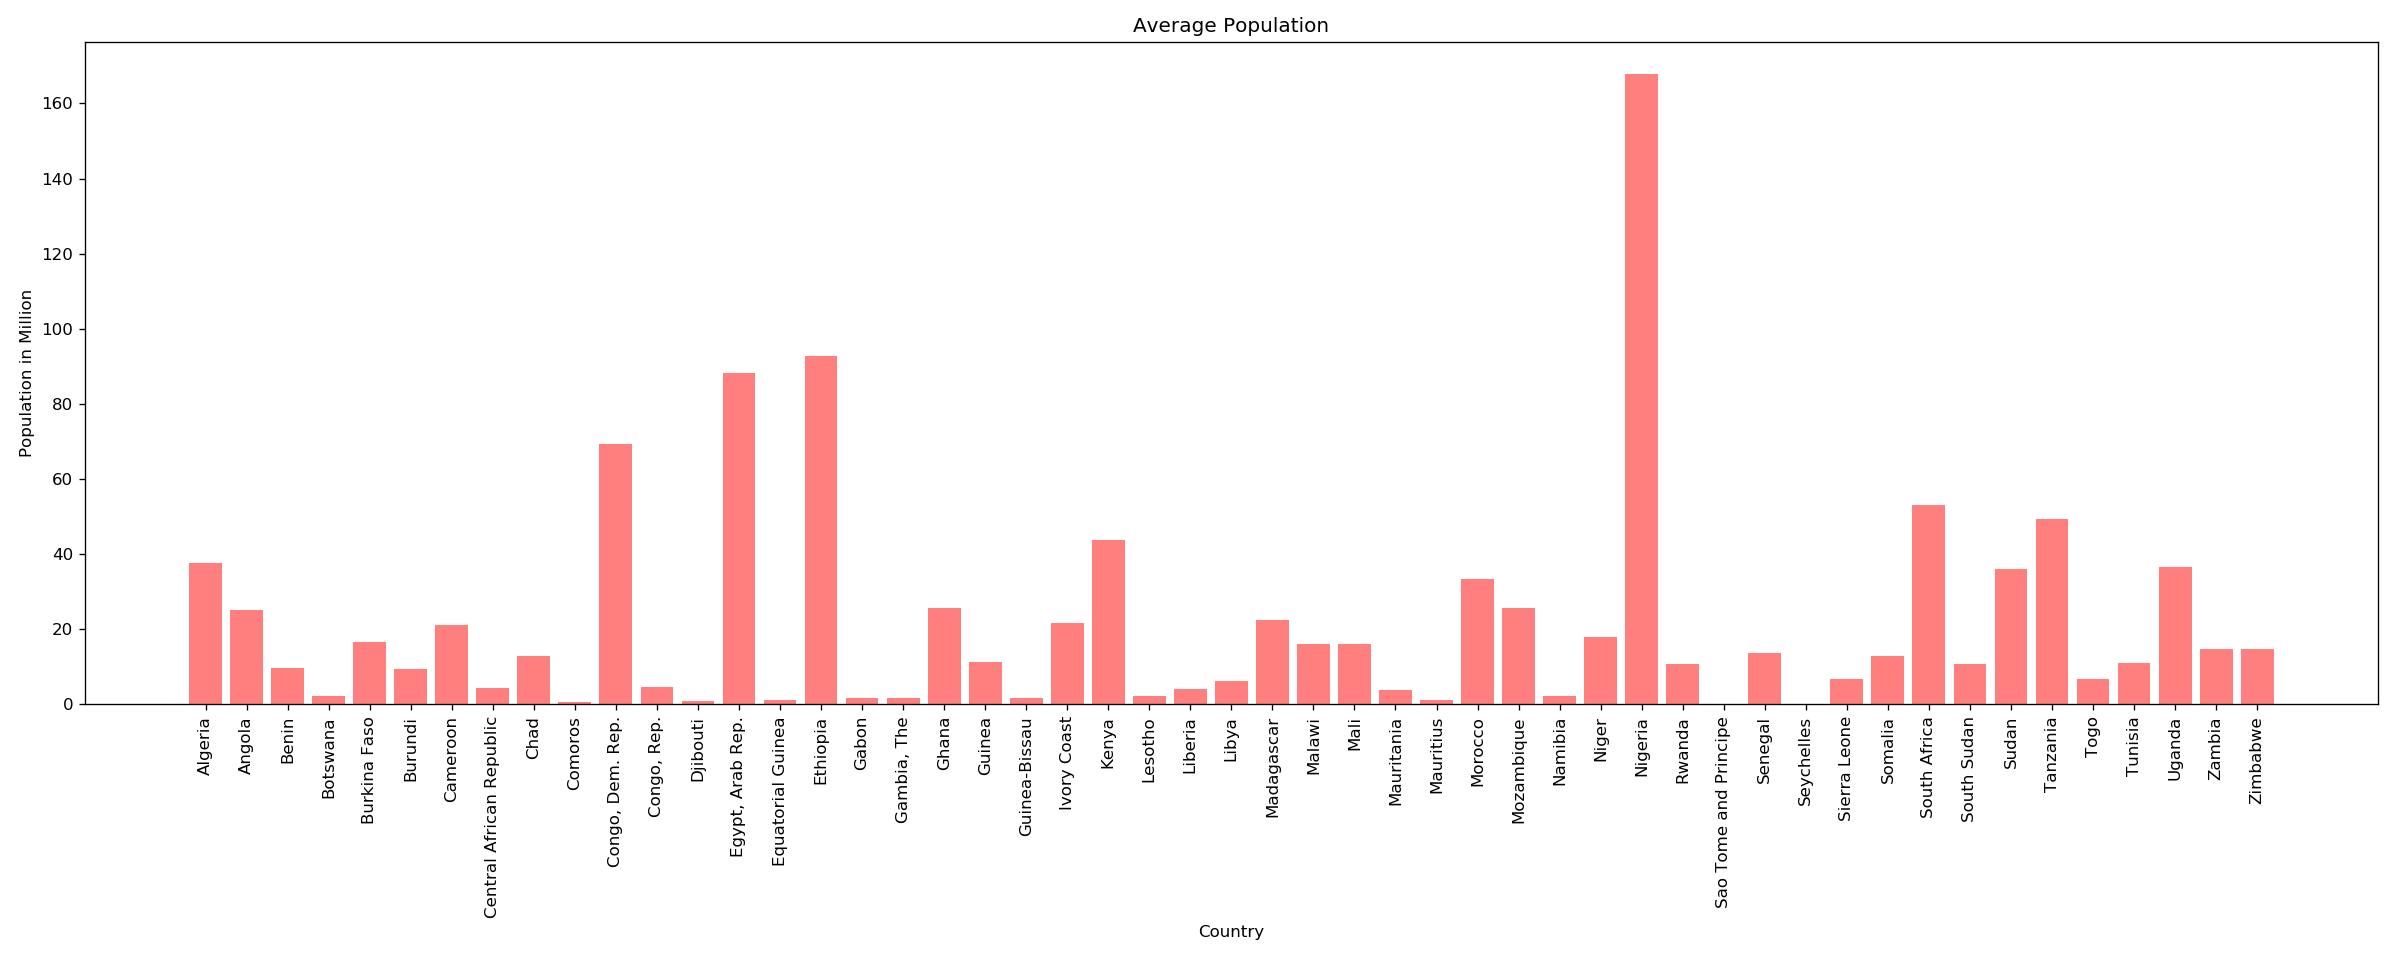

In [254]:
%matplotlib notebook
csv_file = pd.read_csv("data/Population_AF_df.csv")
csv_file.head()
tick_country = csv_file['Country_Name'].tolist()
Avg_Population=csv_file['AVG']
plt.figure(figsize=(20,8))
plt.title("Average Population")
plt.xlabel("Country")
plt.ylabel("Population in Million")
plt.bar(tick_country, Avg_Population, color="red", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg2_population_country.png")

In [476]:
# Export file as a CSV, without the Pandas index, but with the header
Population_AF_df.to_csv("Population_AF_df.csv", index=True, header=True)

In [257]:
#Loading and cleaning Data For Natural Gas
csv_file1 = "data/NATURAL_GAS.csv"
NaturalGas_df_all = pd.read_csv(csv_file1,header=0,encoding = 'unicode_escape',skiprows=4)
NaturalGas_df_all_10=pd.DataFrame(NaturalGas_df_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
      '2014', '2015', '2016', '2017'])
NaturalGas_df_all_10.set_index('Country Name', inplace=True)
NaturalGas_AF_df=NaturalGas_df_all_10.loc[AFRICA_COUNTRIES]
NaturalGas_AF_df=NaturalGas_AF_df.fillna(0)
NaturalGas_AF_df.head()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,4.232687,3.924535,4.475287,3.201062,3.985736,4.344343,4.240251,3.888096,3.123159,2.022808,2.181165
Angola,0.090758,0.066893,0.079455,0.088740,0.118732,0.107676,0.113131,0.083006,0.061829,0.085410,0.186106
Benin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Botswana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Burkina Faso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [259]:
# Export file as a CSV, without the Pandas index, but with the header
NaturalGas_AF_df.to_csv("data/NaturalGas_AF_df.csv", index=True, header=True)

<IPython.core.display.Javascript object>


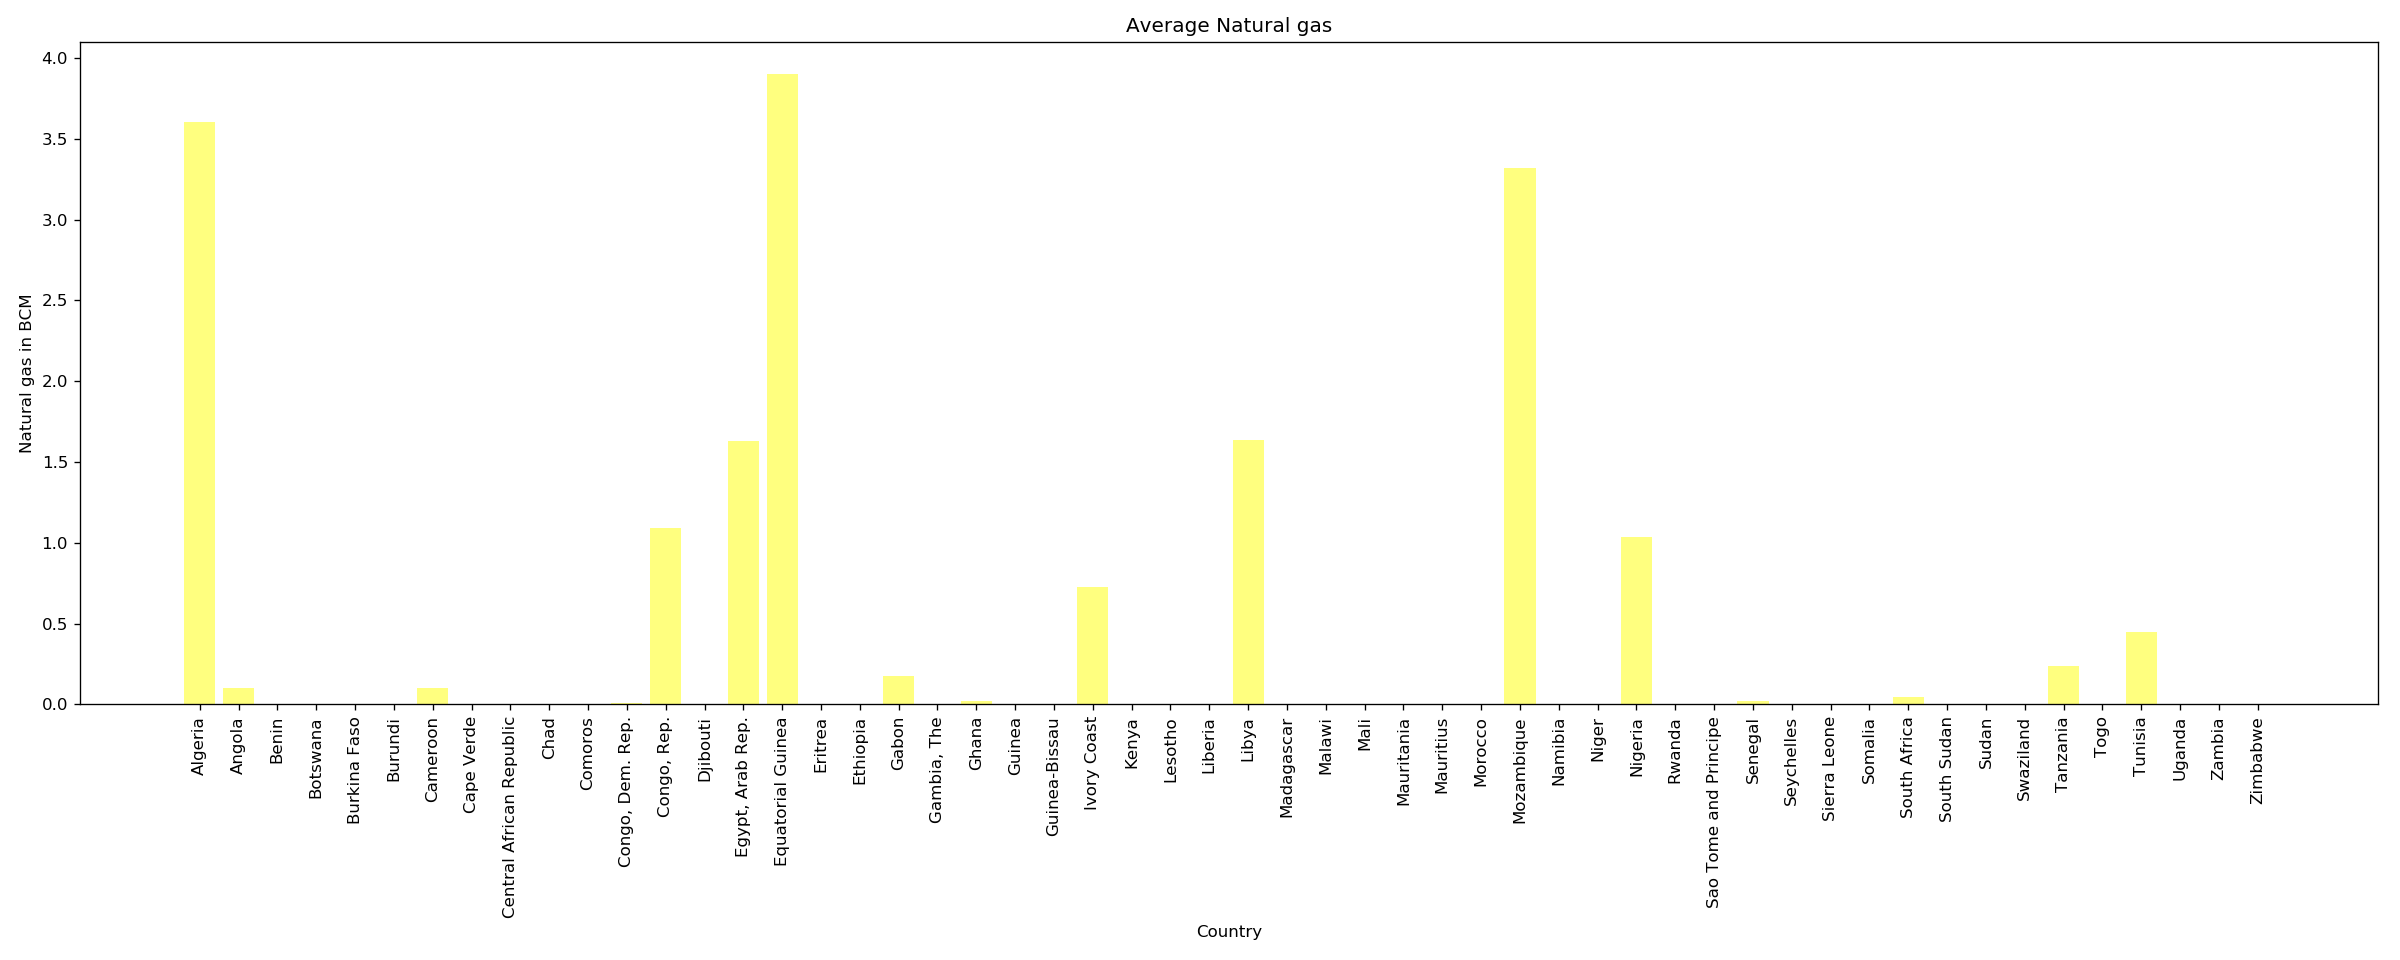

In [262]:
%matplotlib notebook
csv_file = pd.read_csv("data/NaturalGas_AF_df.csv")
csv_file.head()
tick_country = csv_file['Country_Name'].tolist()
Avg_NATURAL_GAS=csv_file['AVG']
plt.figure(figsize=(20,8))
plt.title("Average Natural gas")
plt.xlabel("Country")
plt.ylabel("Natural gas in BCM")
plt.bar(tick_country, Avg_NATURAL_GAS, color="Yellow", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg_Natural_Gas.png")

In [265]:
#Loading and cleaning Data For Poverty Ratio
csv_file2 = "data/POVERTY_RATIO.csv"
PovertyRatio_df_all = pd.read_csv(csv_file2,header=0,encoding = 'unicode_escape',skiprows=4)
PovertyRatio_df_all_10=pd.DataFrame(PovertyRatio_df_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
      '2014', '2015', '2016', '2017'])
PovertyRatio_df_all_10.set_index('Country Name', inplace=True)
PovertyRatio_AF_df=PovertyRatio_df_all_10.loc[AFRICA_COUNTRIES]
PovertyRatio_AF_df=PovertyRatio_AF_df.fillna(0)
PovertyRatio_AF_df.head()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,30.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Benin,0.0,0.0,0.0,0.0,53.1,0.0,0.0,0.0,49.5,0.0,0.0
Botswana,0.0,0.0,18.2,0.0,0.0,0.0,0.0,0.0,16.1,0.0,0.0
Burkina Faso,0.0,0.0,55.3,0.0,0.0,0.0,0.0,43.7,0.0,0.0,0.0


In [480]:
# Export file as a CSV, without the Pandas index, but with the header
PovertyRatio_AF_df.to_csv("PovertyRatio_AF_df.csv", index=True, header=True)

<IPython.core.display.Javascript object>


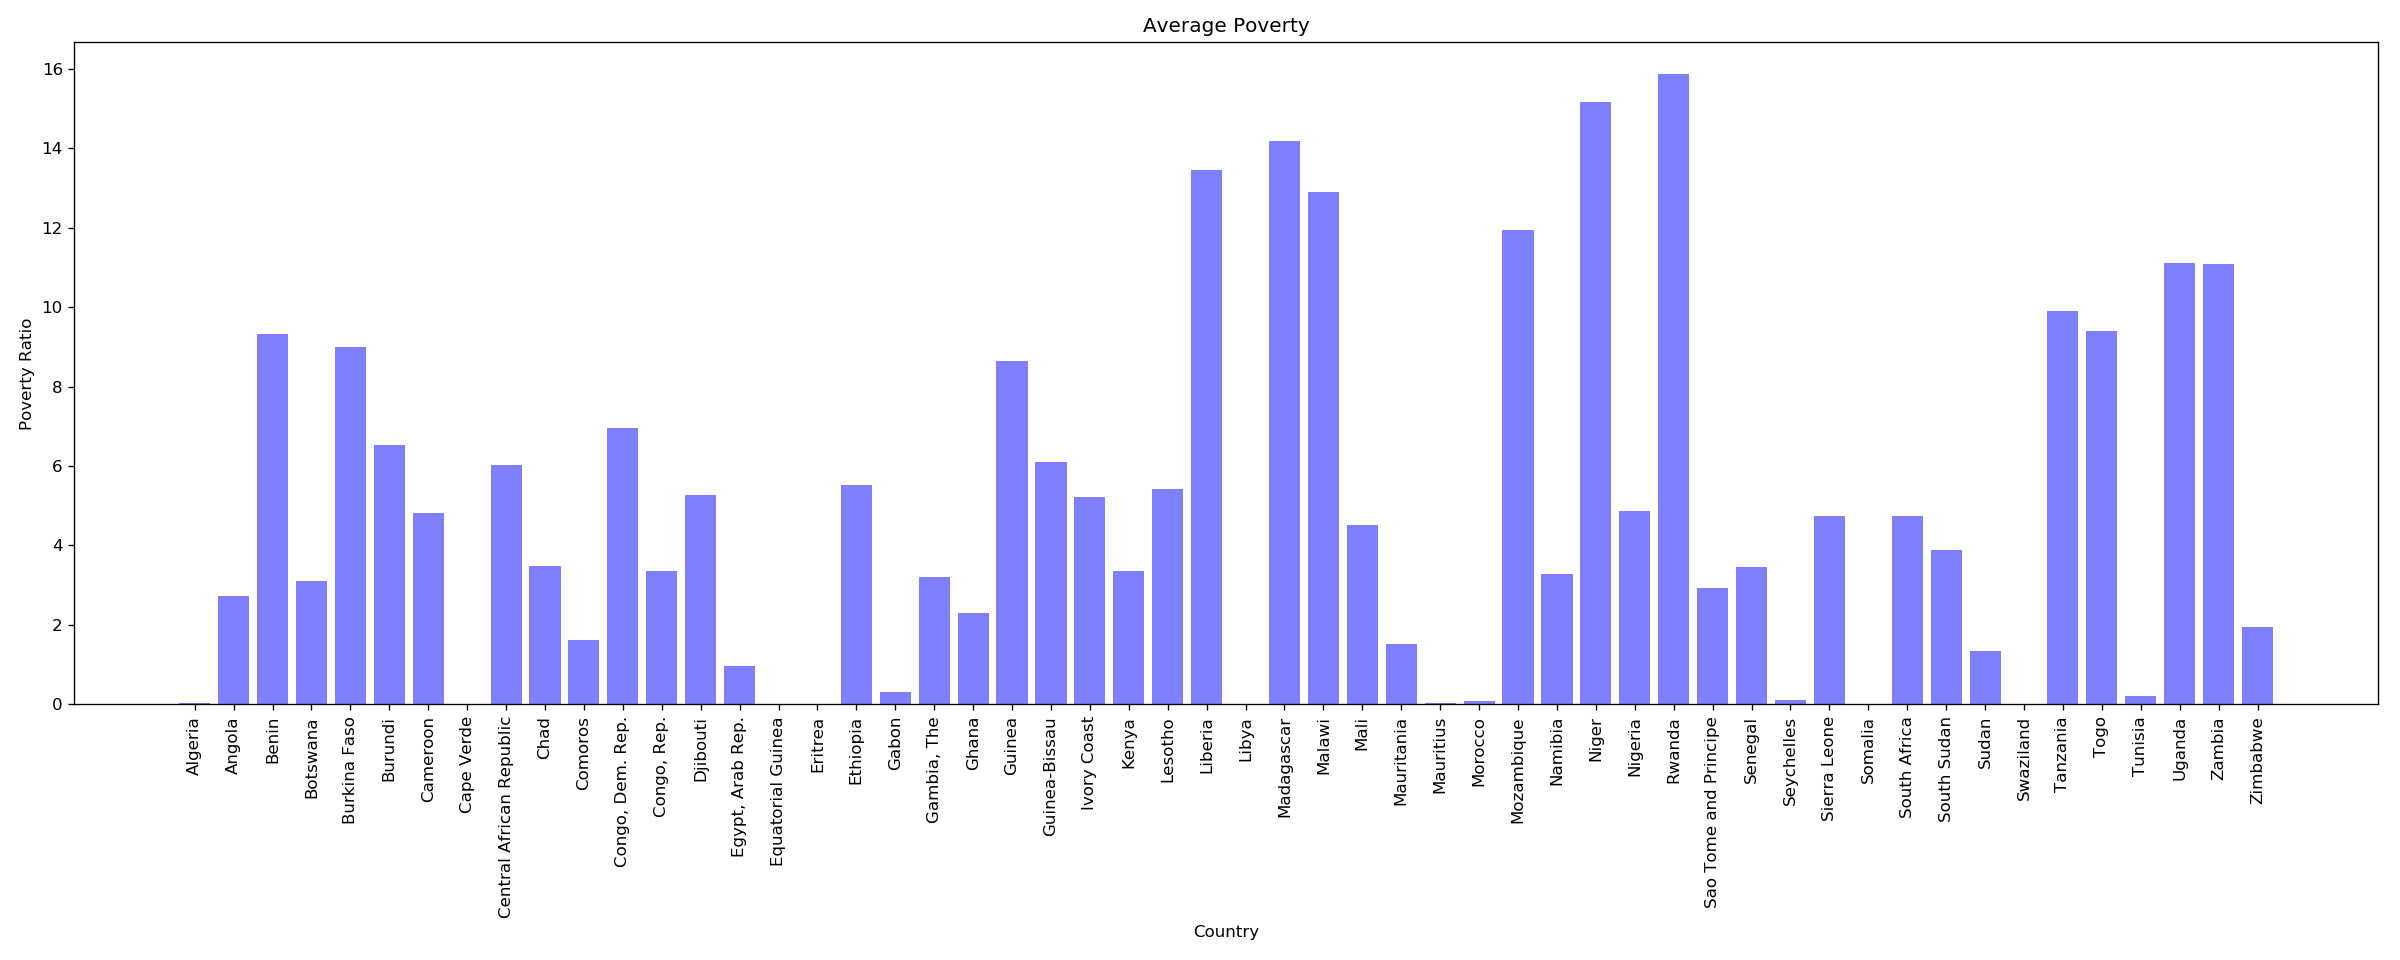

In [279]:
%matplotlib notebook
csv_file = pd.read_csv("data/PovertyRatio_AF_df.csv")
csv_file
tick_country = csv_file['Country_Name'].tolist()
Avg_PovertyRatio=csv_file['AVG']
plt.figure(figsize=(20,8))
plt.title("Average Poverty")
plt.xlabel("Country")
plt.ylabel("Poverty Ratio")
plt.bar(tick_country, Avg_PovertyRatio, color="blue", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg_Poverty.png")

In [312]:
#Loading and cleaning Data For GDP
csv_file3 = "data/GDP.csv"
GDP_df_all = pd.read_csv(csv_file3,header=0,encoding = 'unicode_escape',skiprows=4)
GDP_df_all_10=pd.DataFrame(GDP_df_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
      '2014', '2015', '2016', '2017'])
GDP_df_all_10.set_index('Country Name', inplace=True)
GDP_AF_df=GDP_df_all_10.loc[AFRICA_COUNTRIES]
GDP_AF_df=GDP_AF_df.fillna(0)
GDP_AF_df.head()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,4.232687,3.924535,4.475287,3.201062,3.985736,4.344343,4.240251,3.888096,3.123159,2.022808,2.181165
Angola,0.090758,0.066893,0.079455,0.088740,0.118732,0.107676,0.113131,0.083006,0.061829,0.085410,0.186106
Benin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Botswana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Burkina Faso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [482]:
# Export file as a CSV, without the Pandas index, but with the header
GDP_AF_df.to_csv("GDP_AF_df.csv", index=True, header=True)

<IPython.core.display.Javascript object>


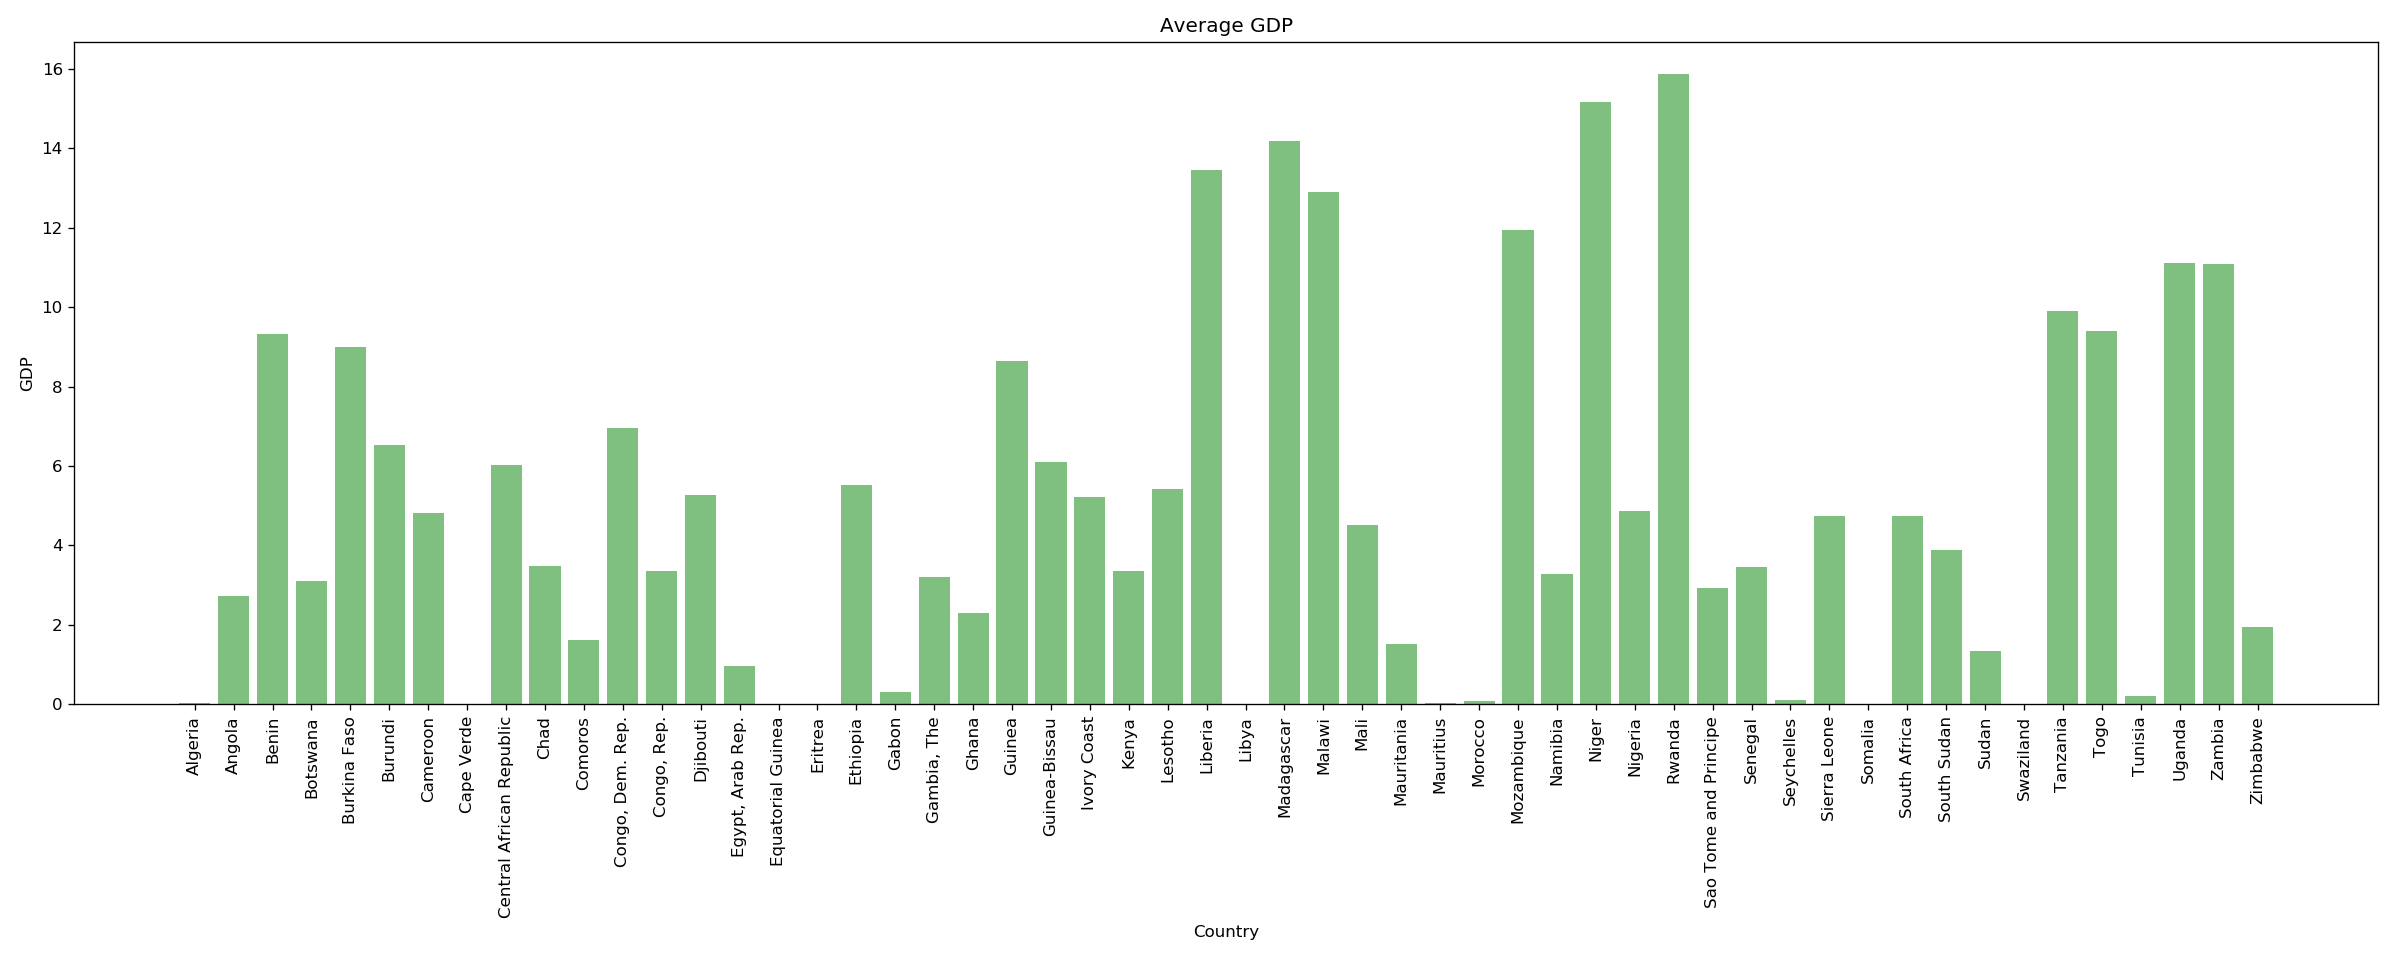

In [280]:
%matplotlib notebook
csv_file = pd.read_csv("data/GDP_AF_df.csv")
tick_country = csv_file['Country_Name'].tolist()
Avg_GDP=csv_file['AVG']
plt.figure(figsize=(20,8))
plt.title("Average GDP")
plt.xlabel("Country")
plt.ylabel("GDP")
plt.bar(tick_country, Avg_PovertyRatio, color="Green", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg_GDP.png")

In [321]:
#Loading and cleaning Data For Fuel Import
csv_file4 = "data/FUEL_IMPORTS.csv"
Fuel_import_all = pd.read_csv(csv_file4,header=0,encoding = 'unicode_escape',skiprows=4)
Fuel_import_all_10=pd.DataFrame(Fuel_import_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
      '2014', '2015', '2016', '2017'])
Fuel_import_all_10.set_index('Country Name', inplace=True)
Fuel_import_AF_df=Fuel_import_all_10.loc[AFRICA_COUNTRIES]
Fuel_import_AF_df=Fuel_import_AF_df.fillna(0)
Fuel_import_AF_df.head()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,1.121166,1.376098,1.066950,2.131796,2.291909,9.700074,7.849372,4.914100,4.591346,3.423314,4.227703
Angola,1.259203,0.000000,14.598091,17.157350,11.659380,3.978355,7.763157,5.735061,1.513633,0.000000,0.000000
Benin,20.445555,14.826503,16.670815,19.631203,16.697293,21.039035,14.125780,13.966792,17.391553,17.993982,17.377140
Botswana,15.571466,16.851559,13.249192,14.663618,16.390500,16.200831,17.250193,15.502199,11.673901,12.936855,14.710651
Burkina Faso,21.907483,23.874502,23.583597,21.984555,23.644919,25.873409,26.130463,31.340499,25.820787,19.973512,24.953562


In [484]:
# Export file as a CSV, without the Pandas index, but with the header
Fuel_import_AF_df.to_csv("Fuel_import_AF_df.csv", index=True, header=True)

<IPython.core.display.Javascript object>


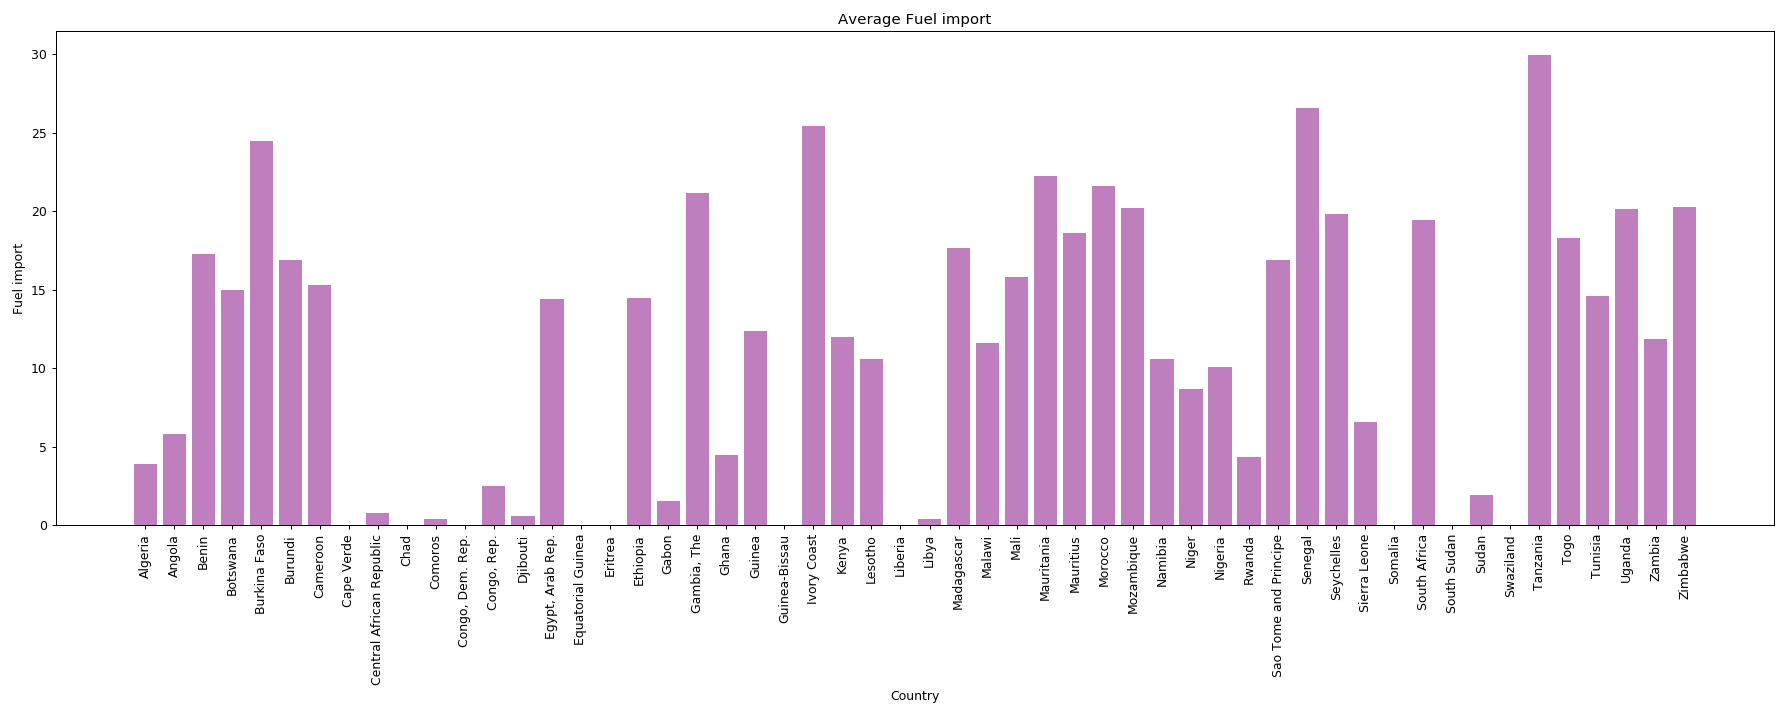

In [7]:
%matplotlib notebook
csv_file = pd.read_csv("data/Fuel_import_AF_df.csv")
tick_country = csv_file['Country_Name'].tolist()
Avg_Fuel_import=csv_file['AVG']
plt.figure(figsize=(20,8))
plt.title("Average Fuel import")
plt.xlabel("Country")
plt.ylabel("Fuel import")
plt.bar(tick_country, Avg_Fuel_import, color="purple", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg_Fuel_import.png")

In [287]:
#Loading and cleaning Data For Birth Rate
csv_file5 = "data/BIRTH_RATE.csv"
Birth_Rate_all = pd.read_csv(csv_file5,header=0,encoding = 'unicode_escape',skiprows=4)
Birth_Rate_all_10=pd.DataFrame(Birth_Rate_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
      '2014', '2015', '2016', '2017'])
Birth_Rate_all_10.set_index('Country Name', inplace=True)
Birth_Rate_AF_df=Birth_Rate_all_10.loc[AFRICA_COUNTRIES]
Birth_Rate_AF_df=Birth_Rate_AF_df.fillna(0)
Birth_Rate_AF_df.head()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,22.555,23.425,24.189,24.762,25.078,25.134,24.945,24.522,23.900,23.132,22.292
Angola,46.947,46.459,45.910,45.314,44.688,44.058,43.446,42.864,42.321,41.819,41.347
Benin,40.167,39.884,39.590,39.278,38.945,38.591,38.218,37.830,37.431,37.026,36.622
Botswana,25.380,25.331,25.311,25.286,25.217,25.079,24.856,24.541,24.140,23.669,23.162
Burkina Faso,43.946,43.438,42.890,42.314,41.721,41.127,40.543,39.977,39.436,38.920,38.420


In [288]:
# Export file as a CSV, without the Pandas index, but with the header
Birth_Rate_AF_df.to_csv("data/Birth_Rate_AF_df.csv", index=True, header=True)

<IPython.core.display.Javascript object>


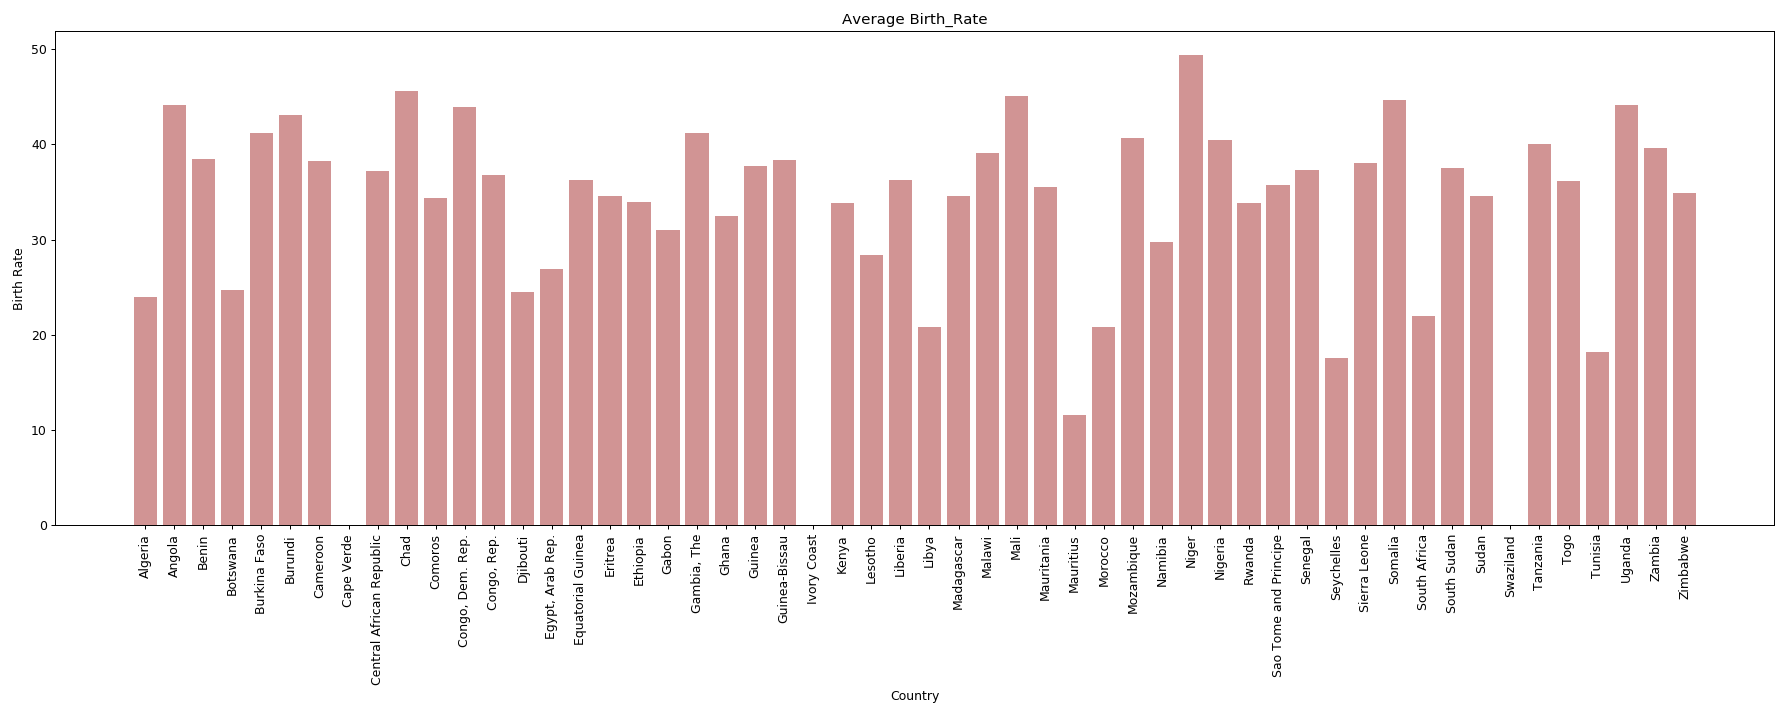

In [8]:
%matplotlib notebook
csv_file8 = pd.read_csv("data/Birth_Rate_AF_df.csv")
tick_country = csv_file8['Country_Name'].tolist()
Avg_Birth_Rate=csv_file8['AVG']
plt.figure(figsize=(20,8))
plt.title("Average Birth_Rate")
plt.xlabel("Country")
plt.ylabel("Birth Rate")
plt.bar(tick_country, Avg_Birth_Rate, color="brown", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg_Birth_Rate.png")

In [291]:
#Loading and cleaning Data For Death Rate
csv_file6 = "data/DEATH_RATE.csv"
Death_Rate_all = pd.read_csv(csv_file6,header=0,encoding = 'unicode_escape',skiprows=4)
Death_Rate_all_10=pd.DataFrame(Death_Rate_all, columns=['Country Name','2007', '2008', '2009', '2010', '2011', '2012', '2013',
      '2014', '2015', '2016', '2017'])
Death_Rate_all_10.set_index('Country Name', inplace=True)
Death_Rate_AF_df=Death_Rate_all_10.loc[AFRICA_COUNTRIES]
Death_Rate_AF_df=Death_Rate_AF_df.fillna(0)
Death_Rate_AF_df.head()

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,
Algeria,4.738,4.737,4.744,4.754,4.766,4.774,4.779,4.778,4.773,4.765,4.758
Angola,12.327,11.654,11.023,10.450,9.949,9.525,9.176,8.899,8.683,8.513,8.372
Benin,10.739,10.497,10.282,10.093,9.926,9.770,9.618,9.469,9.319,9.172,9.029
Botswana,11.437,10.659,9.951,9.330,8.792,8.304,7.843,7.413,7.022,6.684,6.406
Burkina Faso,12.225,11.672,11.141,10.645,10.194,9.787,9.423,9.101,8.818,8.568,8.341


In [488]:
# Export file as a CSV, without the Pandas index, but with the header
Death_Rate_AF_df.to_csv("data/Death_Rate_AF_df.csv", index=True, header=True)

<IPython.core.display.Javascript object>


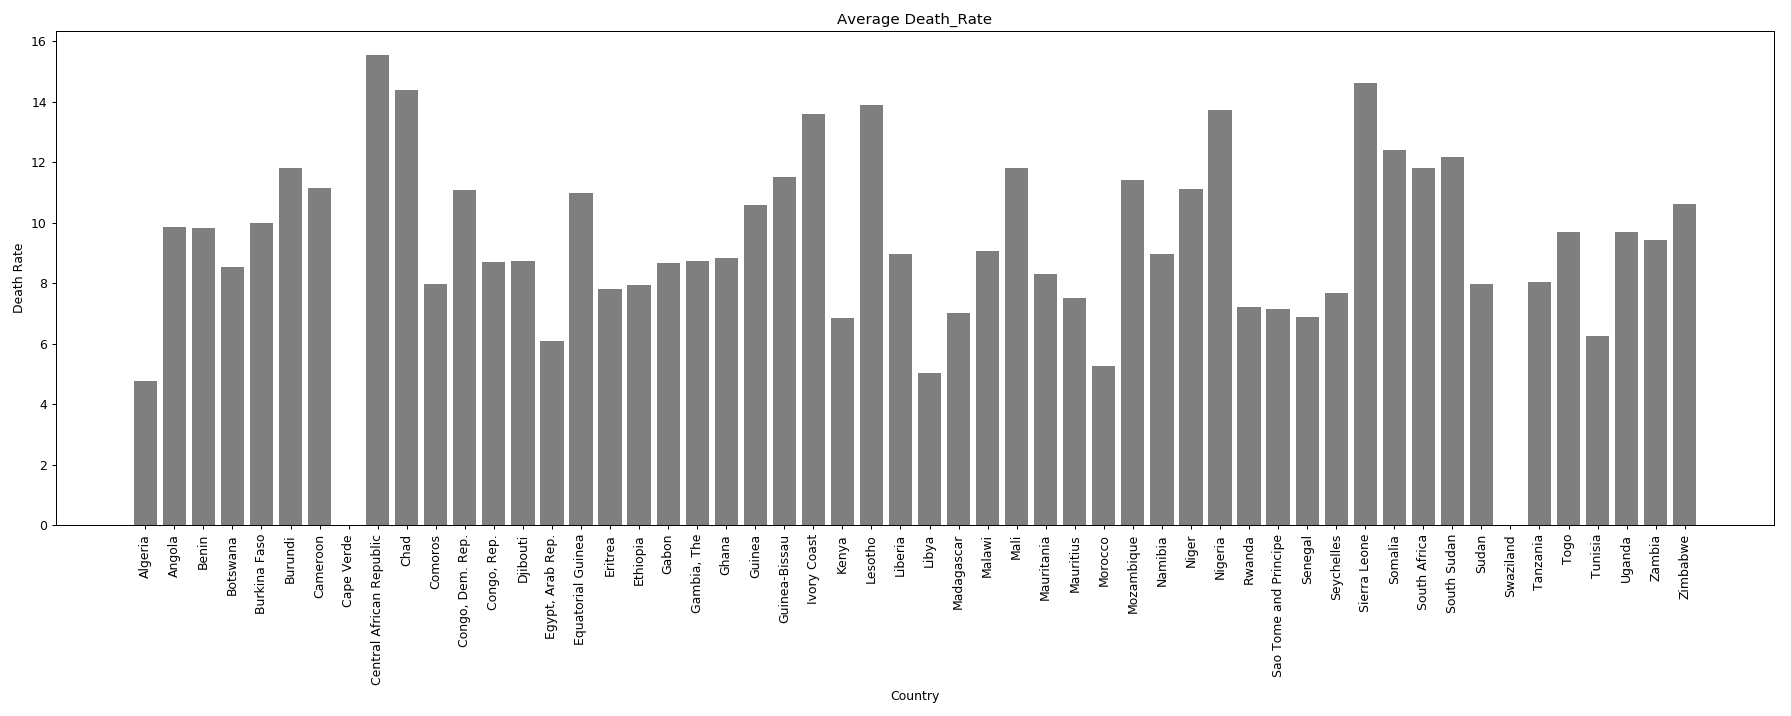

In [11]:
%matplotlib notebook
csv_file = pd.read_csv("data/Death_Rate_AF_df.csv")
tick_country = csv_file['Country_Name'].tolist()
Avg_Death_Rate=csv_file['AVG']
plt.figure(figsize=(20,8))
plt.title("Average Death_Rate")
plt.xlabel("Country")
plt.ylabel("Death Rate")
plt.bar(tick_country, Avg_Death_Rate, color="black", alpha=0.5, align="center")
plt.xticks( rotation="vertical")

plt.show()
plt.tight_layout()
plt.savefig("./Images/chart/avg_Death_Rate.png")

<IPython.core.display.Javascript object>


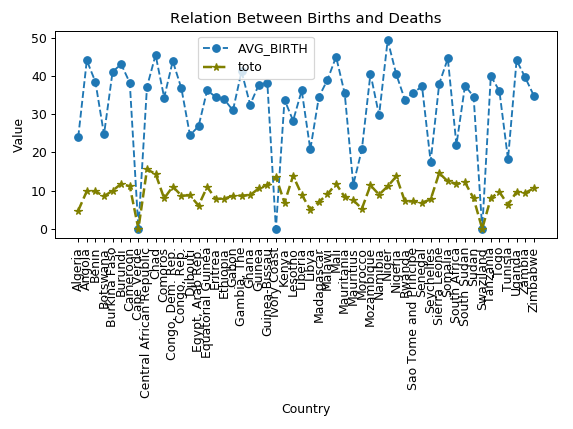

In [12]:
%matplotlib notebook
csv8=csv_file8.rename(columns={'AVG':'AVG_BIRTH'})
csv9=csv_file9.rename(columns={'AVG':'AVG_DEATH'})
merge_table = pd.merge(csv8, csv9, on="Country_Name", how="left")
Relation=pd.DataFrame(merge_table, columns=('Country_Name',"AVG_BIRTH","AVG_DEATH"))
Relation.to_csv("data/Relation_D_B.csv", index=True, header=True)
Relation.head()
x1=Relation[('AVG_BIRTH')]
x2=Relation[('AVG_DEATH')]
x_axis=Relation[('Country_Name')]
area = np.pi*3
colors = (0,0,0)
plt.plot( x_axis, x1, 'o--')
plt.plot( x_axis, x2, marker='*', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.xticks(rotation=90)
plt.title('Relation Between Births and Deaths')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(0.4,1), loc="upper center")
plt.tight_layout()
plt.show()
plt.savefig("./Images/chart/line_relation.png")

In [440]:
%matplotlib notebook
plt.scatter(x_axis, x1, s=area, c=(0,1,0), alpha=0.8)
plt.scatter(x_axis, x2, s=area, c='b', alpha=0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.savefig("./Images/chart/scatter_relation.png")

<IPython.core.display.Javascript object>

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [8]:
#Loading and cleaning Data for the whole trip
csv_file7 = "data/A trip to Africa.csv"
Trip_Recap=Death_Rate_all = pd.read_csv(csv_file7,header=0,encoding = 'unicode_escape')
Trip_Recap.head()

,country,Region,government,State Capital,Primary Language,Other Languages,Population (millions),Natural Resources,pctile_risk,Latitude,Longitude
0,Tunisia,Northern,Presidential Democracy,Tunis,Arabic (and the languages of commerce),French (commerce),11.78,"Petroleum, Phosphates, Iron Ore, Lead, Zinc, Salt",83%,33.8869° N,9.5375° E
1,Cameroon,Middle,Personal Dictatorship,Yaounde,"English, French",24 major African language groups.,25.31,"Petroleum, Bauxite, Iron Ore, Timber, Hydropower",79%,7.3697° N,12.3547° E
2,Algeria,Northern,Military,Algiers,"Arabic,",French,42.68,"Petroleum, Natural Gas, Iron Ore, Phosphates, ...",85%,28.0339° N,1.6596° E
3,Guinea,Western,Presidential Democracy,Conakry,French (spoken by 15-20%),"Eight national languages, Soussou (Susu, in co...",13.40,"Bauxite, Iron Ore, Diamonds, Gold, Uranium, Hy...",90%,9.9456° N,9.6966° W
4,Lesotho,Southern,Parliamentary Democracy,Maseru,"Sesotho (southern Sotho), English","Zulu, Xhosa.",2.29,"Water, Agricultural and Grazing Land, Diamonds...",91%,29.6100° S,28.2336° E


In [5]:
#Connecting to the Local DataBase
rds_connection_string = "root:@Cpin96284@127.0.0.1/Africa_Trip_db"
engine = create_engine(f'mysql://{rds_connection_string}')

In [6]:
#check for tables
engine.table_names()

['birth_rate',
 'death_rate',
 'fuel_import',
 'gdp',
 'natural_gas',
 'population',
 'poverty']

In [317]:
# Use pandas to load csv converted DataFrame into database
Population_AF_df.to_sql(name='Population', con=engine, if_exists='append', index=True)

In [318]:
# Use pandas to load csv converted DataFrame into database
NaturalGas_AF_df.to_sql(name='Natural_GAS', con=engine, if_exists='append', index=True)

In [319]:
# Use pandas to load csv converted DataFrame into database
Population_AF_df.to_sql(name='Poverty', con=engine, if_exists='append', index=True)

In [322]:
# Use pandas to load csv converted DataFrame into database
GDP_AF_df.to_sql(name='GDP', con=engine, if_exists='append', index=True)
Fuel_import_AF_df.to_sql(name='fuel_import', con=engine, if_exists='append', index=True)
Birth_Rate_AF_df.to_sql(name='Birth_Rate', con=engine, if_exists='append', index=True)
Death_Rate_AF_df.to_sql(name='Death_Rate', con=engine, if_exists='append', index=True)


C:\Users\Steve\Anaconda3\lib\site-packages\pandas\io\sql.py:1144: UserWarning: The provided table name 'Birth_Rate' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)
C:\Users\Steve\Anaconda3\lib\site-packages\pandas\io\sql.py:1144: UserWarning: The provided table name 'Death_Rate' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  warnings.warn(msg, UserWarning)


In [323]:
#Reading the Data from the Database
pd.read_sql_query('select * from population', con=engine).head()

,Country Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Algeria,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0
1,Angola,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
2,Benin,8454791.0,8696916.0,8944706.0,9199259.0,9460802.0,9729160.0,10004451.0,10286712.0,10575952.0,10872298.0,11175692.0
3,Botswana,1914414.0,1946351.0,1979882.0,2014866.0,2051339.0,2089315.0,2128507.0,2168573.0,2209197.0,2250260.0,2291661.0
4,Burkina Faso,14252021.0,14689726.0,15141099.0,15605217.0,16081904.0,16571216.0,17072723.0,17585977.0,18110624.0,18646433.0,19193382.0


In [324]:
pd.read_sql_query('select * from Natural_gas', con=engine).head()

,Country Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Algeria,4.232687,3.924535,4.475287,3.201062,3.985736,4.344343,4.240251,3.888096,3.123159,2.022808,2.181165
1,Angola,0.090758,0.066893,0.079455,0.088740,0.118732,0.107676,0.113131,0.083006,0.061829,0.085410,0.186106
2,Benin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Botswana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Burkina Faso,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
import pymongo
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define the 'classDB' database in Mongo
db = client.TripDB2

import json
#df = pd.DataFrame.from_dict(Trip_Recap)

records = json.loads(Trip_Recap.T.to_json()).values()
db.AfricaDB.insert(records)

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


[ObjectId('5d148dd6dcf00621a694ca04'),
 ObjectId('5d148dd6dcf00621a694ca05'),
 ObjectId('5d148dd6dcf00621a694ca06'),
 ObjectId('5d148dd6dcf00621a694ca07'),
 ObjectId('5d148dd6dcf00621a694ca08'),
 ObjectId('5d148dd6dcf00621a694ca09'),
 ObjectId('5d148dd6dcf00621a694ca0a'),
 ObjectId('5d148dd6dcf00621a694ca0b'),
 ObjectId('5d148dd6dcf00621a694ca0c'),
 ObjectId('5d148dd6dcf00621a694ca0d'),
 ObjectId('5d148dd6dcf00621a694ca0e'),
 ObjectId('5d148dd6dcf00621a694ca0f'),
 ObjectId('5d148dd6dcf00621a694ca10'),
 ObjectId('5d148dd6dcf00621a694ca11'),
 ObjectId('5d148dd6dcf00621a694ca12'),
 ObjectId('5d148dd6dcf00621a694ca13'),
 ObjectId('5d148dd6dcf00621a694ca14'),
 ObjectId('5d148dd6dcf00621a694ca15'),
 ObjectId('5d148dd6dcf00621a694ca16'),
 ObjectId('5d148dd6dcf00621a694ca17'),
 ObjectId('5d148dd6dcf00621a694ca18'),
 ObjectId('5d148dd6dcf00621a694ca19'),
 ObjectId('5d148dd6dcf00621a694ca1a'),
 ObjectId('5d148dd6dcf00621a694ca1b'),
 ObjectId('5d148dd6dcf00621a694ca1c'),
 ObjectId('5d148dd6dcf006